In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

C:\Users\sonih\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\sonih\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
comp=pd.read_csv("E:\\itsstudytym\\assignments\\Random Forest\\Company_Data.csv")
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
for i in range(0,len(comp['Sales'])):
    if comp['Sales'][i]>7.490:
        comp['Sales'][i]=1
    else:
        comp['Sales'][i]=0
    
comp.head()

C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1.0,111,48,16,260,83,Good,65,10,Yes,Yes
2,1.0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0.0,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
ShelveLoc=pd.get_dummies(comp['ShelveLoc'],drop_first=True)
comp['Urban']=pd.get_dummies(comp['Urban'],drop_first=True)
comp['US']=pd.get_dummies(comp['US'],drop_first=True)

In [6]:
ShelveLoc

,Good,Medium
0,0,0
1,1,0
2,0,1
3,0,1
4,0,0
...,...,...
395,1,0
396,0,1
397,0,1
398,0,0


In [8]:
comp=pd.concat([comp,ShelveLoc],axis=1)

In [9]:
comp=comp.drop('ShelveLoc',axis=1)
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Good,Medium
0,1.0,138,73,11,276,120,42,17,1,1,0,0
1,1.0,111,48,16,260,83,65,10,1,1,1,0
2,1.0,113,35,10,269,80,59,12,1,1,0,1
3,0.0,117,100,4,466,97,55,14,1,1,0,1
4,0.0,141,64,3,340,128,38,13,1,0,0,0


In [10]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(comp.iloc[:,:8])
comp.iloc[:,:8]=scale.transform(comp.iloc[:,:8])
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Good,Medium
0,1.0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,1,1,0,0
1,1.0,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1,1,1,0
2,1.0,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,1,1,0,1
3,0.0,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,1,1,0,1
4,0.0,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,1,0,0,0


In [11]:
comp['Sales']=comp['Sales'].astype(int)

In [12]:
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Good,Medium
0,1,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,1,1,0,0
1,1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1,1,1,0
2,1,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,1,1,0,1
3,0,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,1,1,0,1
4,0,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,1,0,0,0


In [13]:
RFM=RandomForestClassifier(n_estimators=50)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=comp.iloc[:,1:]
y=comp.iloc[:,:1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)

In [26]:
RFM.fit(X_train,y_train)

C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
y_pred=RFM.predict(X_test)

In [28]:
RFM.score(X_test,y_test)

0.8166666666666667

In [31]:
cm=confusion_matrix(y_pred,y_test)

In [30]:
accuracy_score(y_pred,y_test)

0.8166666666666667

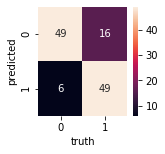

In [33]:
plt.figure(figsize=(2,2))
sbn.heatmap(cm,annot=True)
plt.xlabel('truth')
plt.ylabel('predicted')
plt.show()